<a href="https://colab.research.google.com/github/S1rDavid9/ml_summative/blob/main/Moss_growth_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("MOSS GROWTH PREDICTION SYSTEM - LINEAR REGRESSION ANALYSIS")
print("="*80)
print("\n All libraries imported successfully!\n")


MOSS GROWTH PREDICTION SYSTEM - LINEAR REGRESSION ANALYSIS

 All libraries imported successfully!



In [2]:
print("="*80)
print("STEP 1: LOADING DATASET")
print("="*80)


try:
    df = pd.read_csv('lettuce.csv', encoding="ISO-8859-1")
    print(" Dataset loaded successfully!")
    print(f" Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns\n")
except FileNotFoundError:
    print(" ERROR: 'lettuce.csv' not found!")
    print("Please download from: https://www.kaggle.com/datasets/jurijsruko/lettuce")
    print("Save it in the same folder as this notebook and run again.")
    exit()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Display basic information
print("Dataset Information:")
print(df.info())
print("\n")

# Display statistical summary
print("Statistical Summary:")
print(df.describe())
print("\n")

# Check for missing values
print("Missing Values Check:")
print(df.isnull().sum())
print("\n")

# Check data types
print("Data Types:")
print(df.dtypes)
print("\n")

STEP 1: LOADING DATASET
 Dataset loaded successfully!
 Dataset shape: 3169 rows, 7 columns

First 5 rows of the dataset:
   Plant_ID      Date  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023              33.4            53              582   
1         1  8/4/2023              33.5            53              451   
2         1  8/5/2023              33.4            59              678   
3         1  8/6/2023              33.4            68              420   
4         1  8/7/2023              33.4            74              637   

   pH Level  Growth Days  
0       6.4            1  
1       6.1            2  
2       6.4            3  
3       6.4            4  
4       6.5            5  


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1

STEP 2: DATA VISUALIZATION AND EXPLORATORY DATA ANALYSIS


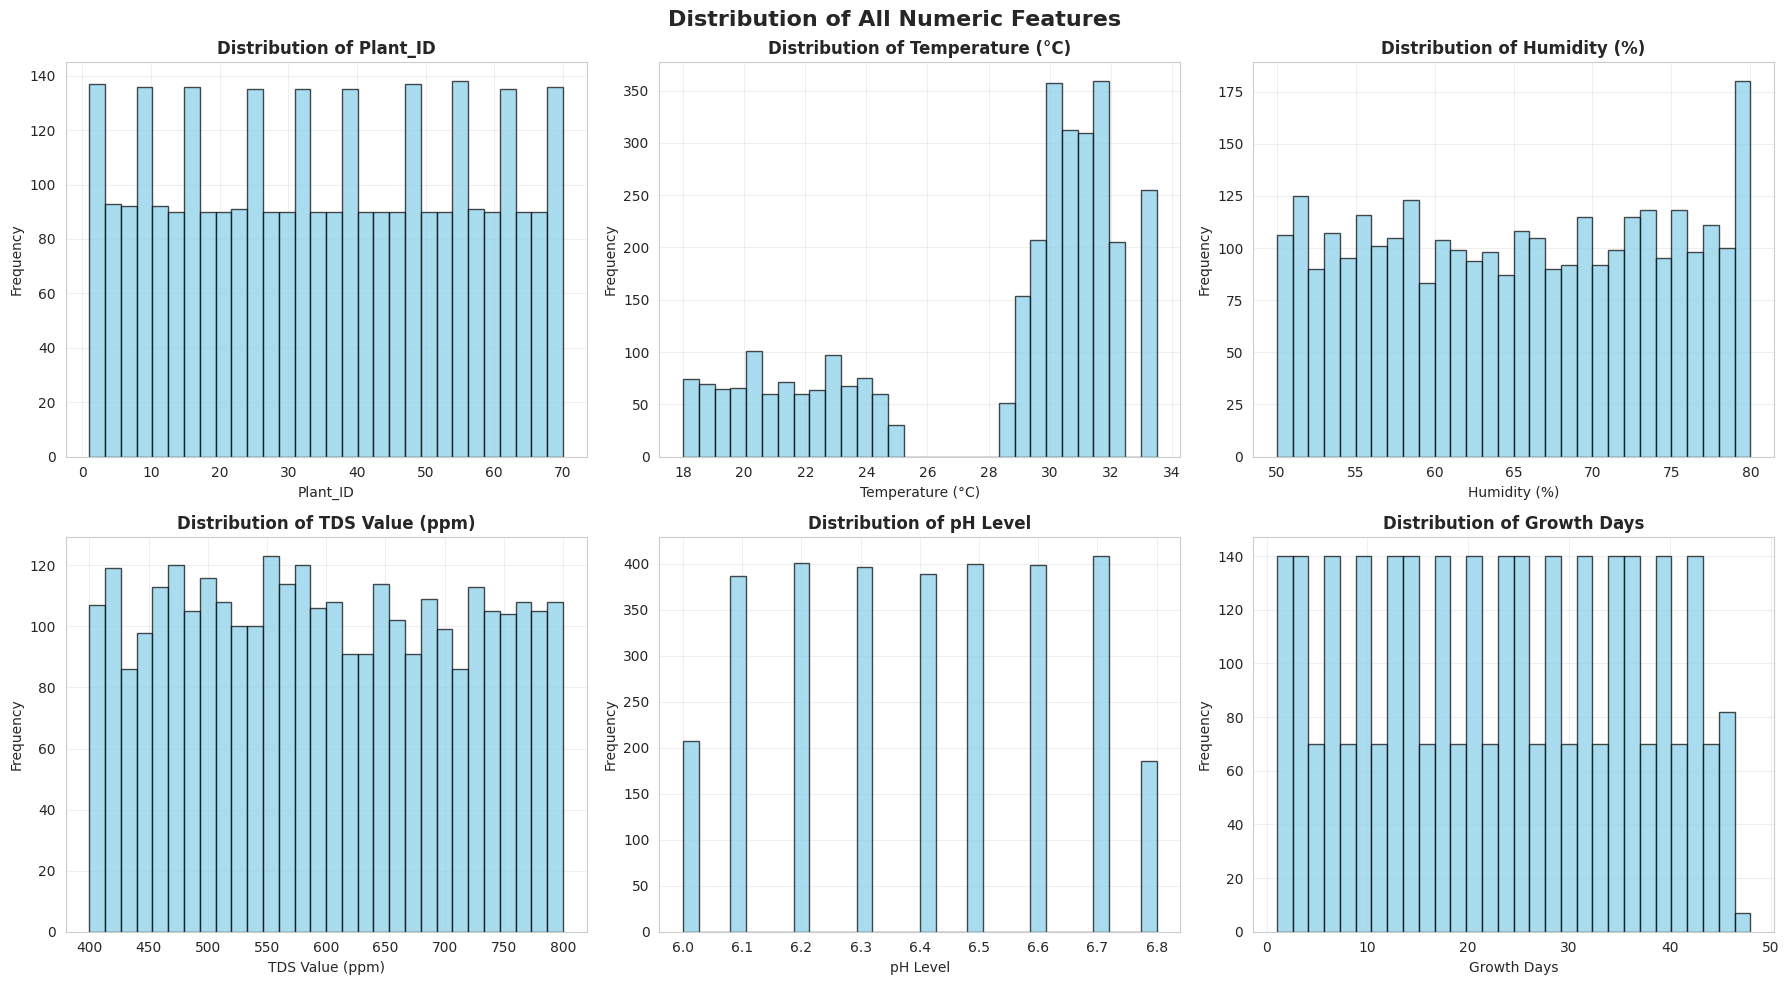

 Feature distributions plotted and saved as 'feature_distributions.png'

INTERPRETATION:
- Temperature: Check if normally distributed or skewed
- Humidity: Look for concentration of values
- TDS: Nutrient level variations
- pH: Check if values fall in optimal growing range
- Growth_Days: Analyze target variability



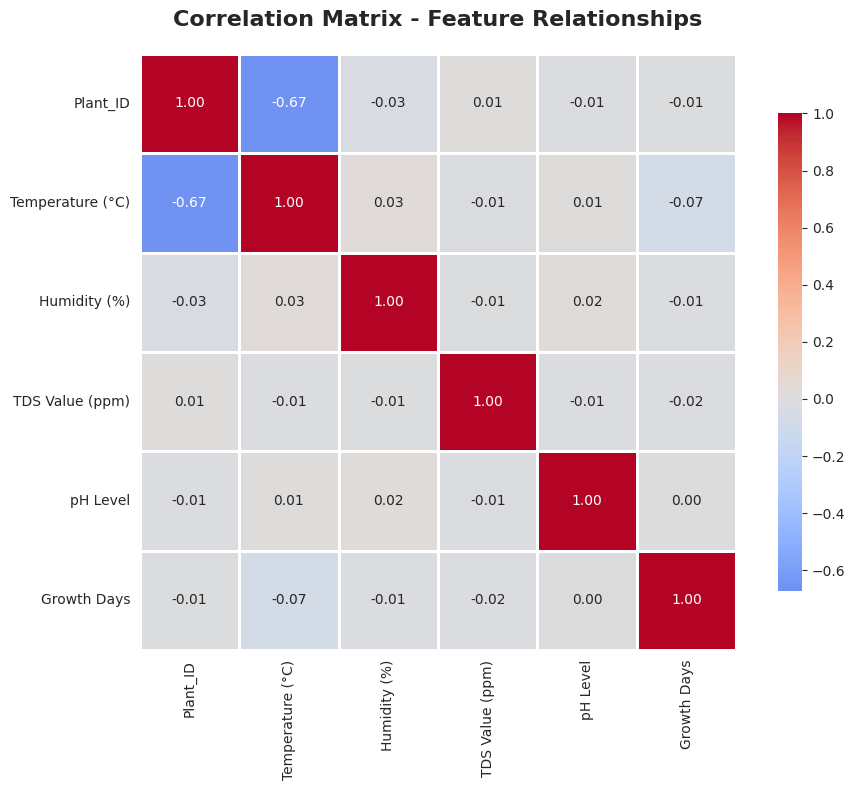

 Correlation heatmap plotted and saved as 'correlation_heatmap.png'

INTERPRETATION:




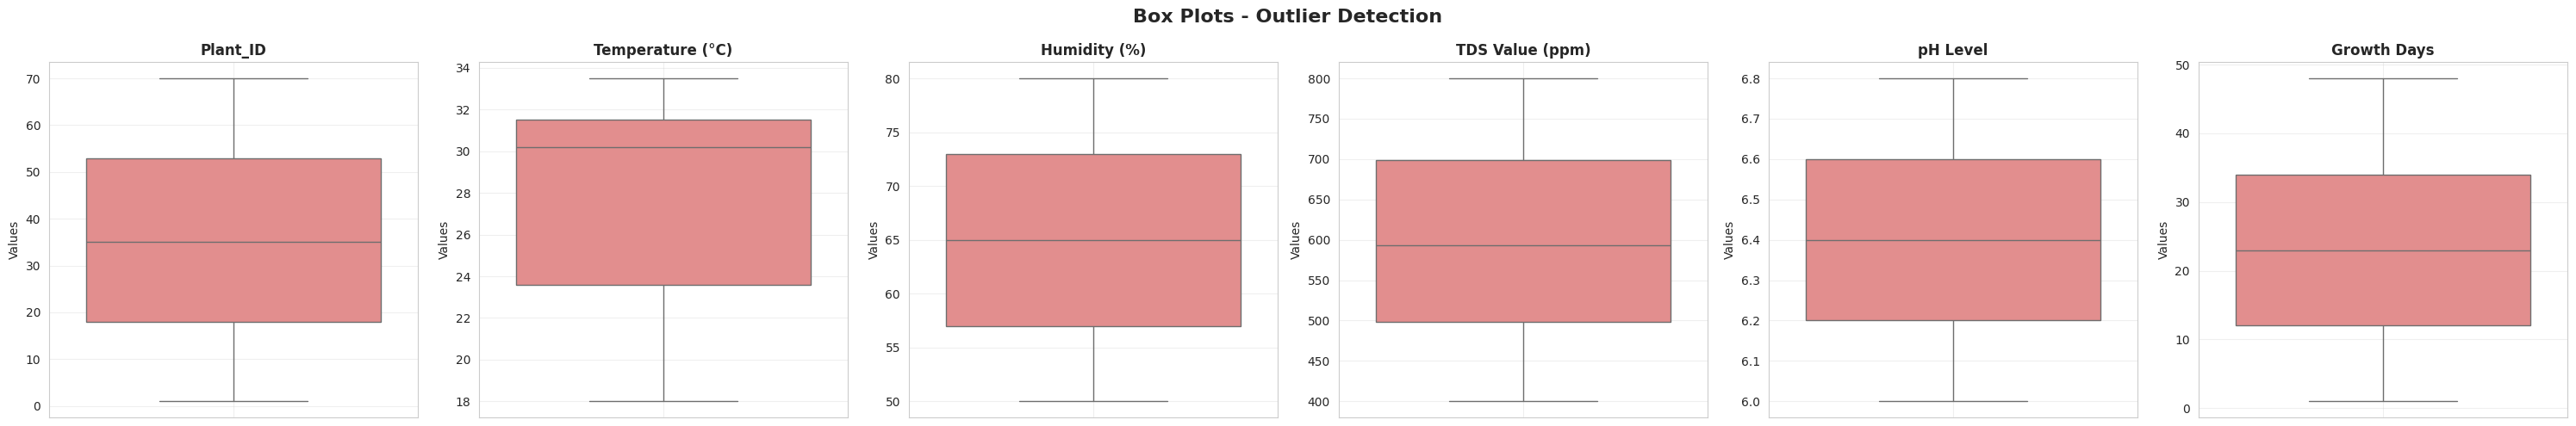

 Box plots plotted and saved as 'boxplots_outliers.png'

Creating pairplot (this may take a moment)...


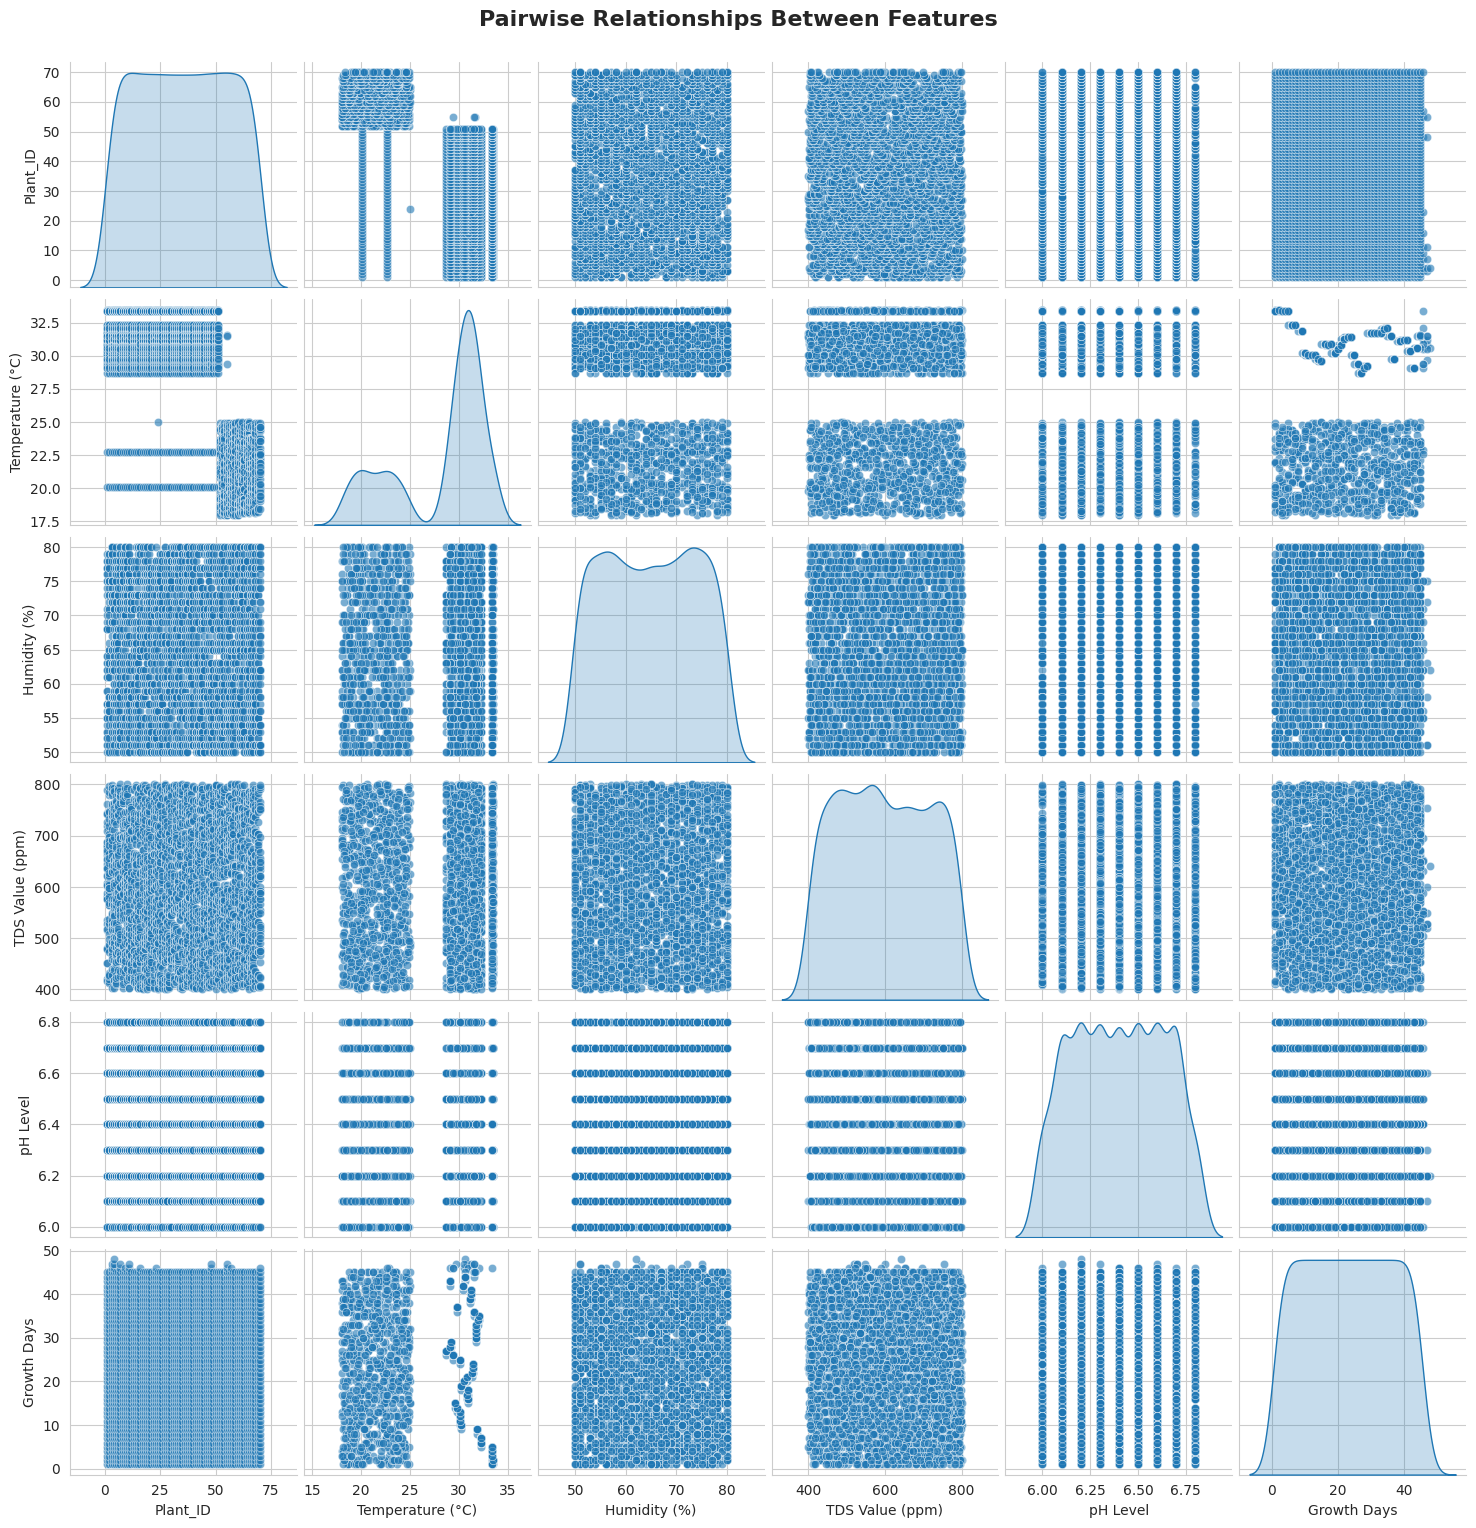

 Pairplot created and saved as 'pairplot.png'



In [3]:
import math

print("="*80)
print("STEP 2: DATA VISUALIZATION AND EXPLORATORY DATA ANALYSIS")
print("="*80)

# Select only numeric columns for plotting
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ========================================================================================
# 3.1 Distribution of Features
# ========================================================================================
num_features = len(numeric_features)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

fig.suptitle('Distribution of All Numeric Features', fontsize=16, fontweight='bold')

for idx, feature in enumerate(numeric_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

# Hide unused axes
for i in range(num_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Feature distributions plotted and saved as 'feature_distributions.png'\n")

print("INTERPRETATION:")
print("- Temperature: Check if normally distributed or skewed")
print("- Humidity: Look for concentration of values")
print("- TDS: Nutrient level variations")
print("- pH: Check if values fall in optimal growing range")
print("- Growth_Days: Analyze target variability\n")


# ========================================================================================
# 3.2 Correlation Heatmap
# ========================================================================================
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    fmt='.2f'
)

plt.title('Correlation Matrix - Feature Relationships', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Correlation heatmap plotted and saved as 'correlation_heatmap.png'\n")

print("INTERPRETATION:")
target = 'Growth_Days'
if target in numeric_features:
    for feature in numeric_features:
        if feature != target:
            corr = correlation_matrix.loc[feature, target]
            strength = (
                "Strong" if abs(corr) > 0.7 else
                "Moderate" if abs(corr) > 0.4 else
                "Weak"
            )
            print(f"  - {feature}: {corr:.3f} ({strength})")
print("\n")


# ========================================================================================
# 3.3 Box Plots for Outlier Detection
# ========================================================================================
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

if num_features == 1:
    axes = [axes]  # ensure list for consistency

for idx, feature in enumerate(numeric_features):
    sns.boxplot(y=df[feature], ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'{feature}', fontweight='bold')
    axes[idx].set_ylabel('Values')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Box plots plotted and saved as 'boxplots_outliers.png'\n")


# ========================================================================================
# 3.4 Pairplot for Relationships
# ========================================================================================
print("Creating pairplot (this may take a moment)...")

sns.pairplot(df[numeric_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=16, fontweight='bold')
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Pairplot created and saved as 'pairplot.png'\n")


STEP 3: FEATURE ENGINEERING
Analyzing features for engineering decisions...

Target Variable: Growth Days
Feature Variables: ['Plant_ID', 'Date', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']

Feature Importance Analysis (Based on Correlation with Target):
------------------------------------------------------------
Temperature (°C)    0.074601
TDS Value (ppm)     0.020633
Humidity (%)        0.014481
Plant_ID            0.005229
pH Level            0.003023
Name: Growth Days, dtype: float64




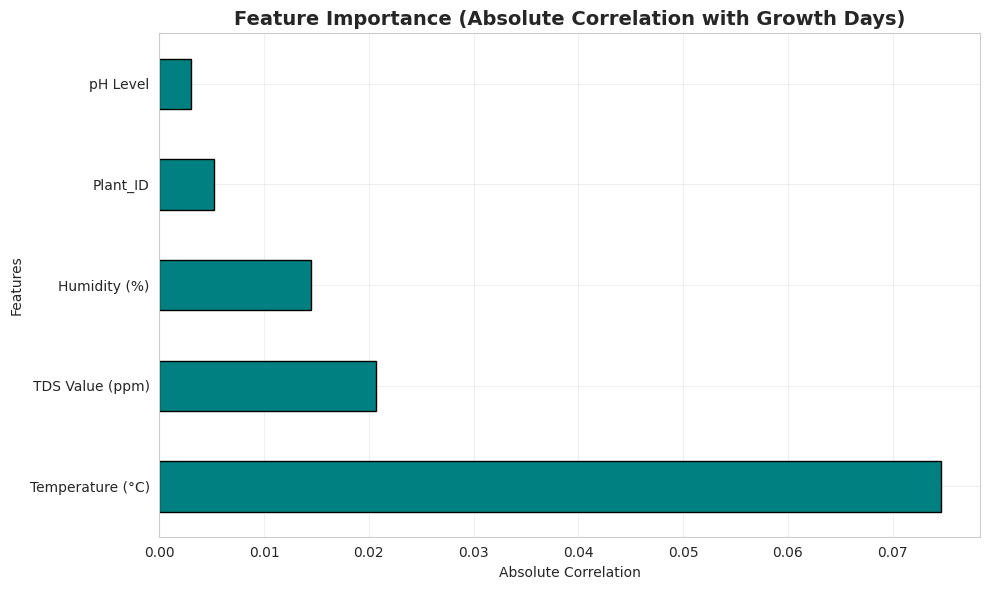

✓ Feature importance plotted and saved as 'feature_importance.png'

FEATURE ENGINEERING DECISIONS:
------------------------------------------------------------
All columns in dataset:
['Plant_ID', 'Date', 'Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']


   Dropping 'Plant_ID' - Not predictive (just an identifier)
   Dropping 'Date' - Not predictive (temporal identifier)

 Target Variable identified: 'Growth Days'

Dropping non-predictive columns: ['Plant_ID', 'Date']
 Columns dropped successfully

Remaining columns for modeling:
['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']


FEATURE ENGINEERING SUMMARY:
------------------------------------------------------------
   Non-predictive columns removed (IDs, dates)
   All remaining features are numeric and relevant
   Target variable clearly identified


Features (X) shape: (3169, 4)
Features (X) columns: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level

In [4]:
print("="*80)
print("STEP 3: FEATURE ENGINEERING")
print("="*80)

# 4.1 Check for columns to drop
print("Analyzing features for engineering decisions...\n")

# Identify target variable
target_column = 'Growth_Days'
if target_column not in df.columns:
    # Try to find the target column with different naming
    possible_names = ['growth_days', 'Growth Days', 'GrowthDays', 'Days']
    for name in possible_names:
        if name in df.columns:
            target_column = name
            break

print(f"Target Variable: {target_column}")
print(f"Feature Variables: {[col for col in df.columns if col != target_column]}\n")

# 4.2 Feature Importance Analysis (using correlation)
print("Feature Importance Analysis (Based on Correlation with Target):")
print("-" * 60)

if target_column in df.columns:
    feature_importance = abs(correlation_matrix[target_column]).sort_values(ascending=False)
    feature_importance = feature_importance[feature_importance.index != target_column]

    print(feature_importance)
    print("\n")

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='barh', color='teal', edgecolor='black')
    plt.title('Feature Importance (Absolute Correlation with Growth Days)',
              fontsize=14, fontweight='bold')
    plt.xlabel('Absolute Correlation')
    plt.ylabel('Features')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✓ Feature importance plotted and saved as 'feature_importance.png'\n")

# 4.3 Decision on dropping columns
print("FEATURE ENGINEERING DECISIONS:")
print("-" * 60)

# First, let's identify which columns to keep
print("All columns in dataset:")
print(df.columns.tolist())
print("\n")

# Define columns to drop (non-predictive features)
columns_to_drop = []

# Check for ID columns
if 'Plant_ID' in df.columns:
    columns_to_drop.append('Plant_ID')
    print("   Dropping 'Plant_ID' - Not predictive (just an identifier)")

# Check for Date columns
if 'Date' in df.columns:
    columns_to_drop.append('Date')
    print("   Dropping 'Date' - Not predictive (temporal identifier)")

# Identify the target column (Growth Days with various possible names)
possible_target_names = ['Growth_Days', 'Growth Days', 'growth_days', 'GrowthDays',
                         'Growth_Days (days)', 'Days', 'Growth Days (days)']
target_column = None

for col in df.columns:
    if any(target_name.lower() in col.lower() for target_name in possible_target_names):
        target_column = col
        break

if target_column is None:
    # If not found, use the last column as target
    target_column = df.columns[-1]
    print(f"\n Warning: Target column not clearly identified. Using '{target_column}' as target.")

print(f"\n Target Variable identified: '{target_column}'")

# Drop the identified columns
if columns_to_drop:
    print(f"\nDropping non-predictive columns: {columns_to_drop}")
    df = df.drop(columns=columns_to_drop)
    print(" Columns dropped successfully")

print("\nRemaining columns for modeling:")
print(df.columns.tolist())
print("\n")

print("FEATURE ENGINEERING SUMMARY:")
print("-" * 60)
print("   Non-predictive columns removed (IDs, dates)")
print("   All remaining features are numeric and relevant")
print("   Target variable clearly identified")
print("\n")

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Features (X) shape: {X.shape}")
print(f"Features (X) columns: {X.columns.tolist()}")
print(f"Target (y) shape: {y.shape}")
print(f"Target (y) name: '{target_column}'")
print("\n")

In [5]:
print("="*80)
print("STEP 4: DATA TYPE VERIFICATION AND CONVERSION")
print("="*80)

print("Checking data types:")
print(X.dtypes)
print("\n")

# Check if any non-numeric columns exist
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()

if len(non_numeric_cols) > 0:
    print(f" Non-numeric columns found: {non_numeric_cols}")
    print("Converting to numeric...")

    for col in non_numeric_cols:
        X[col] = pd.to_numeric(X[col], errors='coerce')

    print(" Conversion complete!\n")
else:
    print(" All features are already numeric - no conversion needed!\n")

# Check for any NaN values after conversion
if X.isnull().sum().sum() > 0:
    print(" Missing values detected after conversion. Filling with median...")
    X = X.fillna(X.median())
    print(" Missing values handled!\n")

STEP 4: DATA TYPE VERIFICATION AND CONVERSION
Checking data types:
Temperature (°C)    float64
Humidity (%)          int64
TDS Value (ppm)       int64
pH Level            float64
dtype: object


 All features are already numeric - no conversion needed!



In [6]:
print("="*80)
print("STEP 5: SPLITTING DATA INTO TRAIN AND TEST SETS")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({(len(X_train)/len(X)*100):.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({(len(X_test)/len(X)*100):.1f}%)")
print("\n")

STEP 5: SPLITTING DATA INTO TRAIN AND TEST SETS
Training set size: 2535 samples (80.0%)
Test set size: 634 samples (20.0%)




In [7]:
print("="*80)
print("STEP 6: DATA STANDARDIZATION (Feature Scaling)")
print("="*80)

print("Before Standardization:")
print(X_train.describe())
print("\n")

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("After Standardization:")
print(X_train_scaled.describe())
print("\n")

print(" Data standardization complete!")
print("  - Mean ≈ 0, Standard Deviation ≈ 1 for all features")
print("  - This ensures all features contribute equally to the model\n")

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')
print(" Scaler saved as 'scaler.pkl'\n")

STEP 6: DATA STANDARDIZATION (Feature Scaling)
Before Standardization:
       Temperature (°C)  Humidity (%)  TDS Value (ppm)     pH Level
count       2535.000000   2535.000000      2535.000000  2535.000000
mean          28.078225     64.906509       597.292702     6.401302
std            4.708365      9.021478       116.166587     0.234853
min           18.000000     50.000000       400.000000     6.000000
25%           23.550000     57.000000       497.000000     6.200000
50%           30.100000     65.000000       591.000000     6.400000
75%           31.500000     73.000000       699.000000     6.600000
max           33.500000     80.000000       800.000000     6.800000


After Standardization:
       Temperature (°C)  Humidity (%)  TDS Value (ppm)      pH Level
count      2.535000e+03  2.535000e+03     2.535000e+03  2.535000e+03
mean      -1.219275e-16 -1.856941e-16    -2.186285e-16 -5.122354e-16
std        1.000197e+00  1.000197e+00     1.000197e+00  1.000197e+00
min       -2.140

In [8]:
print("="*80)
print("STEP 6.5: FINAL NaN CHECK AND HANDLING")
print("="*80)

print("Checking for NaN values in scaled data...")
print(f"NaN in X_train_scaled: {X_train_scaled.isnull().sum().sum()}")
print(f"NaN in X_test_scaled: {X_test_scaled.isnull().sum().sum()}")
print(f"NaN in y_train: {y_train.isnull().sum()}")
print(f"NaN in y_test: {y_test.isnull().sum()}")
print("\n")

# Handle any NaN values
if X_train_scaled.isnull().sum().sum() > 0:
    print(" NaN values detected in X_train_scaled. Filling with 0...")
    X_train_scaled = X_train_scaled.fillna(0)
    print(" X_train_scaled NaN values handled\n")

if X_test_scaled.isnull().sum().sum() > 0:
    print(" NaN values detected in X_test_scaled. Filling with 0...")
    X_test_scaled = X_test_scaled.fillna(0)
    print(" X_test_scaled NaN values handled\n")

if y_train.isnull().sum() > 0:
    print(" NaN values detected in y_train. Removing corresponding rows...")
    valid_indices = ~y_train.isnull()
    y_train = y_train[valid_indices]
    X_train_scaled = X_train_scaled[valid_indices]
    print(" y_train NaN values handled\n")

if y_test.isnull().sum() > 0:
    print(" NaN values detected in y_test. Removing corresponding rows...")
    valid_indices = ~y_test.isnull()
    y_test = y_test[valid_indices]
    X_test_scaled = X_test_scaled[valid_indices]
    print(" y_test NaN values handled\n")

print("Final check:")
print(f" X_train_scaled shape: {X_train_scaled.shape}")
print(f" X_test_scaled shape: {X_test_scaled.shape}")
print(f" y_train shape: {y_train.shape}")
print(f" y_test shape: {y_test.shape}")
print(f" All NaN values handled! Ready for modeling.\n")

STEP 6.5: FINAL NaN CHECK AND HANDLING
Checking for NaN values in scaled data...
NaN in X_train_scaled: 0
NaN in X_test_scaled: 0
NaN in y_train: 0
NaN in y_test: 0


Final check:
 X_train_scaled shape: (2535, 4)
 X_test_scaled shape: (634, 4)
 y_train shape: (2535,)
 y_test shape: (634,)
 All NaN values handled! Ready for modeling.



In [9]:
print("="*80)
print("STEP 7: MODEL 1 - LINEAR REGRESSION WITH GRADIENT DESCENT")
print("="*80)

# Using SGDRegressor for gradient descent
lr_model = SGDRegressor(max_iter=10000, tol=1e-3, random_state=42,
                        learning_rate='constant', eta0=0.01)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)

print(f"Linear Regression Results:")
print(f"  Training RMSE: {lr_train_rmse:.4f}")
print(f"  Test RMSE: {lr_test_rmse:.4f}")
print(f"  Training R²: {lr_train_r2:.4f}")
print(f"  Test R²: {lr_test_r2:.4f}")
print(f"  Test MAE: {lr_test_mae:.4f}")
print("\n")

STEP 7: MODEL 1 - LINEAR REGRESSION WITH GRADIENT DESCENT
Linear Regression Results:
  Training RMSE: 13.1198
  Test RMSE: 13.2753
  Training R²: -0.0099
  Test R²: -0.0199
  Test MAE: 11.2546




In [10]:
print("="*80)
print("STEP 8: MODEL 2 - DECISION TREE REGRESSOR")
print("="*80)

dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5,
                                 min_samples_leaf=2, random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Calculate metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
dt_train_r2 = r2_score(y_train, y_train_pred_dt)
dt_test_r2 = r2_score(y_test, y_test_pred_dt)
dt_test_mae = mean_absolute_error(y_test, y_test_pred_dt)

print(f"Decision Tree Results:")
print(f"  Training RMSE: {dt_train_rmse:.4f}")
print(f"  Test RMSE: {dt_test_rmse:.4f}")
print(f"  Training R²: {dt_train_r2:.4f}")
print(f"  Test R²: {dt_test_r2:.4f}")
print(f"  Test MAE: {dt_test_mae:.4f}")
print("\n")

STEP 8: MODEL 2 - DECISION TREE REGRESSOR
Decision Tree Results:
  Training RMSE: 6.6415
  Test RMSE: 8.6101
  Training R²: 0.7412
  Test R²: 0.5710
  Test MAE: 4.9099




In [11]:
print("="*80)
print("STEP 9: MODEL 3 - RANDOM FOREST REGRESSOR")
print("="*80)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15,
                                 min_samples_split=5, min_samples_leaf=2,
                                 random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)

print(f"Random Forest Results:")
print(f"  Training RMSE: {rf_train_rmse:.4f}")
print(f"  Test RMSE: {rf_test_rmse:.4f}")
print(f"  Training R²: {rf_train_r2:.4f}")
print(f"  Test R²: {rf_test_r2:.4f}")
print(f"  Test MAE: {rf_test_mae:.4f}")
print("\n")


STEP 9: MODEL 3 - RANDOM FOREST REGRESSOR
Random Forest Results:
  Training RMSE: 4.8642
  Test RMSE: 8.0603
  Training R²: 0.8612
  Test R²: 0.6240
  Test MAE: 4.8275




STEP 10: MODEL COMPARISON
            Model  Train RMSE  Test RMSE  Train R²   Test R²  Test MAE
Linear Regression   13.119832  13.275303 -0.009926 -0.019923 11.254635
    Decision Tree    6.641505   8.610078  0.741199  0.570965  4.909944
    Random Forest    4.864180   8.060342  0.861180  0.624002  4.827507




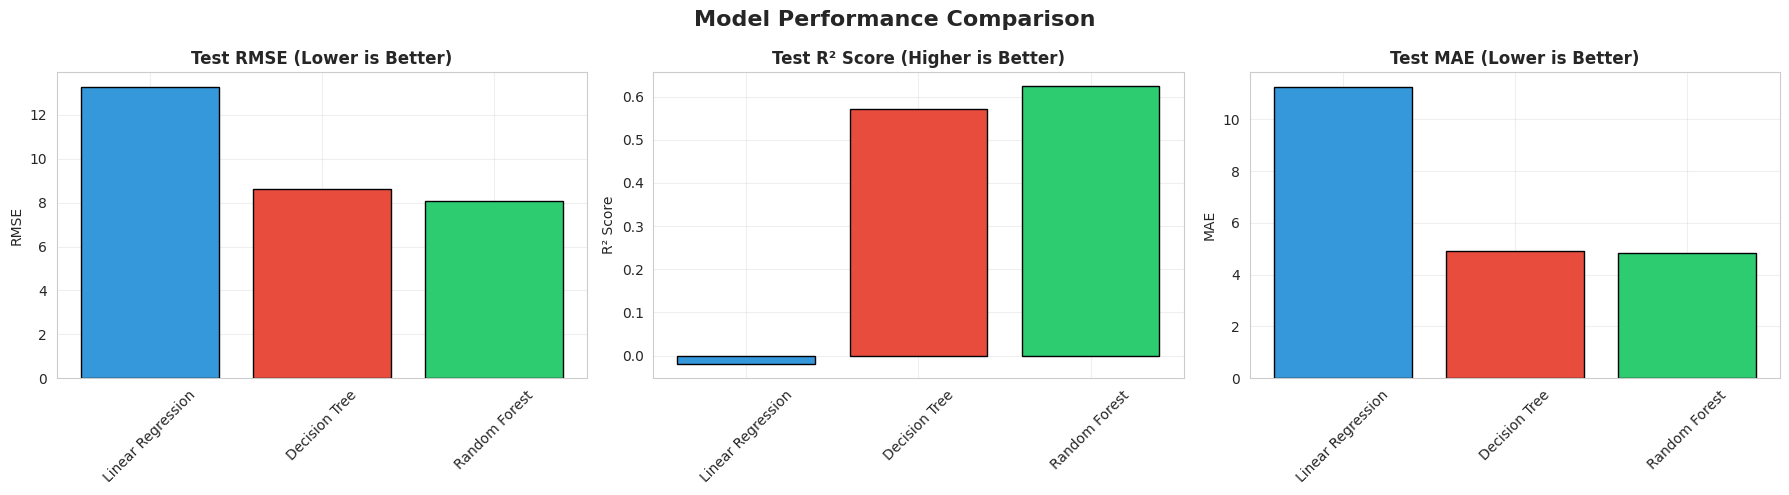

 Model comparison plotted and saved as 'model_comparison.png'

🏆 BEST MODEL: Random Forest
   Test R²: 0.6240
   Test RMSE: 8.0603



In [12]:
print("="*80)
print("STEP 10: MODEL COMPARISON")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train RMSE': [lr_train_rmse, dt_train_rmse, rf_train_rmse],
    'Test RMSE': [lr_test_rmse, dt_test_rmse, rf_test_rmse],
    'Train R²': [lr_train_r2, dt_train_r2, rf_train_r2],
    'Test R²': [lr_test_r2, dt_test_r2, rf_test_r2],
    'Test MAE': [lr_test_mae, dt_test_mae, rf_test_mae]
})

print(comparison_df.to_string(index=False))
print("\n")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# RMSE Comparison
axes[0].bar(comparison_df['Model'], comparison_df['Test RMSE'],
            color=['#3498db', '#e74c3c', '#2ecc71'], edgecolor='black')
axes[0].set_title('Test RMSE (Lower is Better)', fontweight='bold')
axes[0].set_ylabel('RMSE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)

# R² Comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test R²'],
            color=['#3498db', '#e74c3c', '#2ecc71'], edgecolor='black')
axes[1].set_title('Test R² Score (Higher is Better)', fontweight='bold')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)

# MAE Comparison
axes[2].bar(comparison_df['Model'], comparison_df['Test MAE'],
            color=['#3498db', '#e74c3c', '#2ecc71'], edgecolor='black')
axes[2].set_title('Test MAE (Lower is Better)', fontweight='bold')
axes[2].set_ylabel('MAE')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Model comparison plotted and saved as 'model_comparison.png'\n")

# Determine best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Test R²: {comparison_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   Test RMSE: {comparison_df.loc[best_model_idx, 'Test RMSE']:.4f}\n")

STEP 11: PLOTTING LOSS CURVES


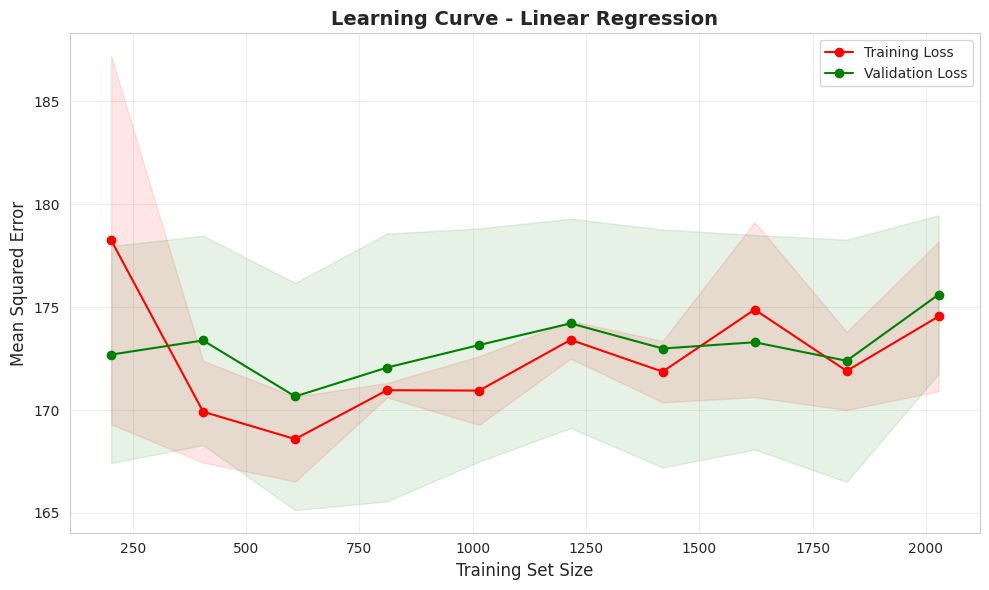

 Linear Regression learning curve saved



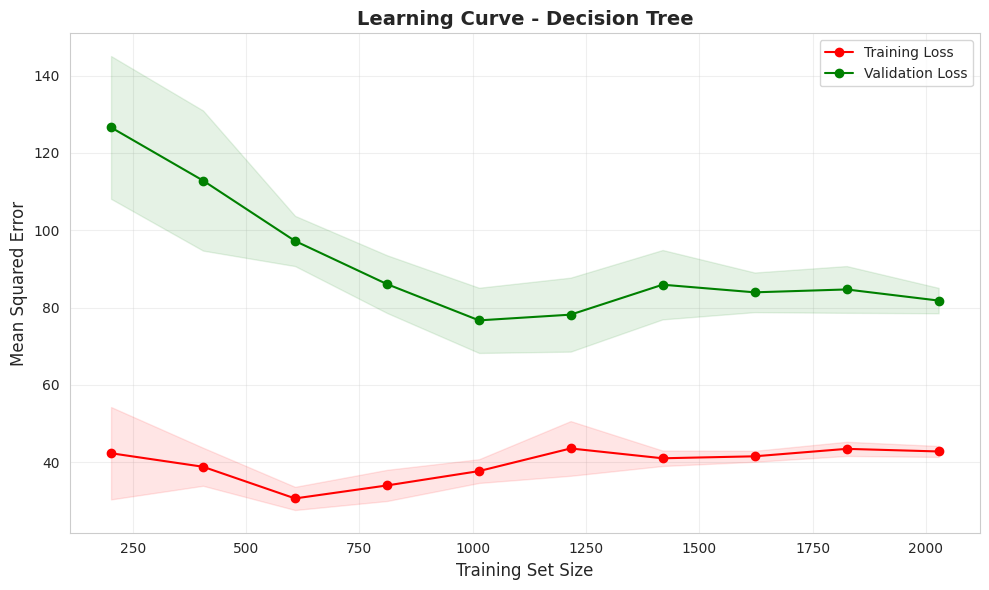

 Decision Tree learning curve saved



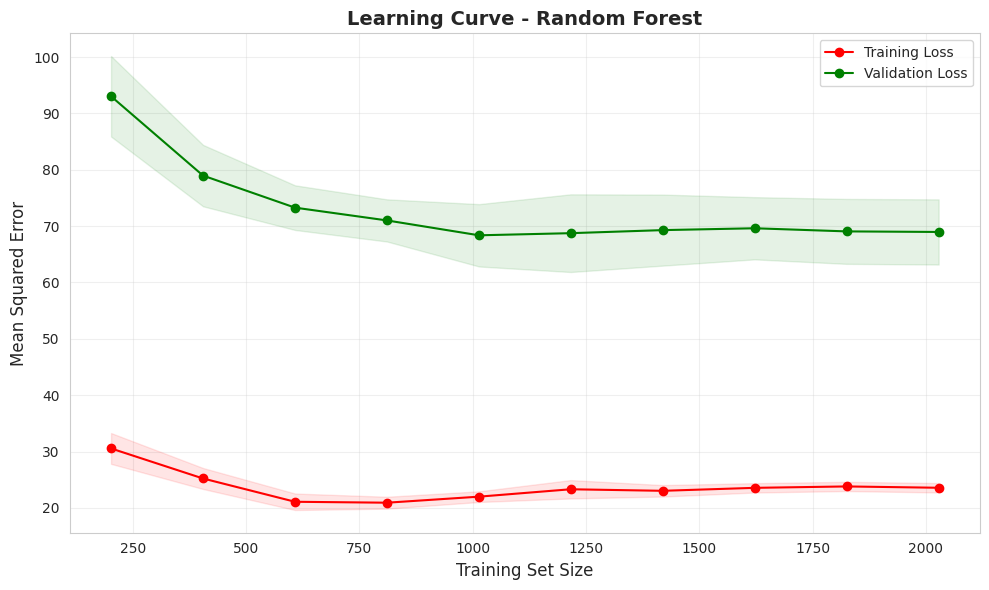

 Random Forest learning curve saved



In [13]:
print("="*80)
print("STEP 11: PLOTTING LOSS CURVES")
print("="*80)

# For Linear Regression with SGD, we'll plot learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Loss")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Loss")

    plt.title(f'Learning Curve - {title}', fontsize=14, fontweight='bold')
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'learning_curve_{title.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot learning curves for all models


plot_learning_curve(lr_model, "Linear Regression", X_train_scaled, y_train)
print(" Linear Regression learning curve saved\n")

plot_learning_curve(dt_model, "Decision Tree", X_train_scaled, y_train)
print(" Decision Tree learning curve saved\n")

plot_learning_curve(rf_model, "Random Forest", X_train_scaled, y_train)
print(" Random Forest learning curve saved\n")


STEP 12: SCATTER PLOTS - ACTUAL VS PREDICTED


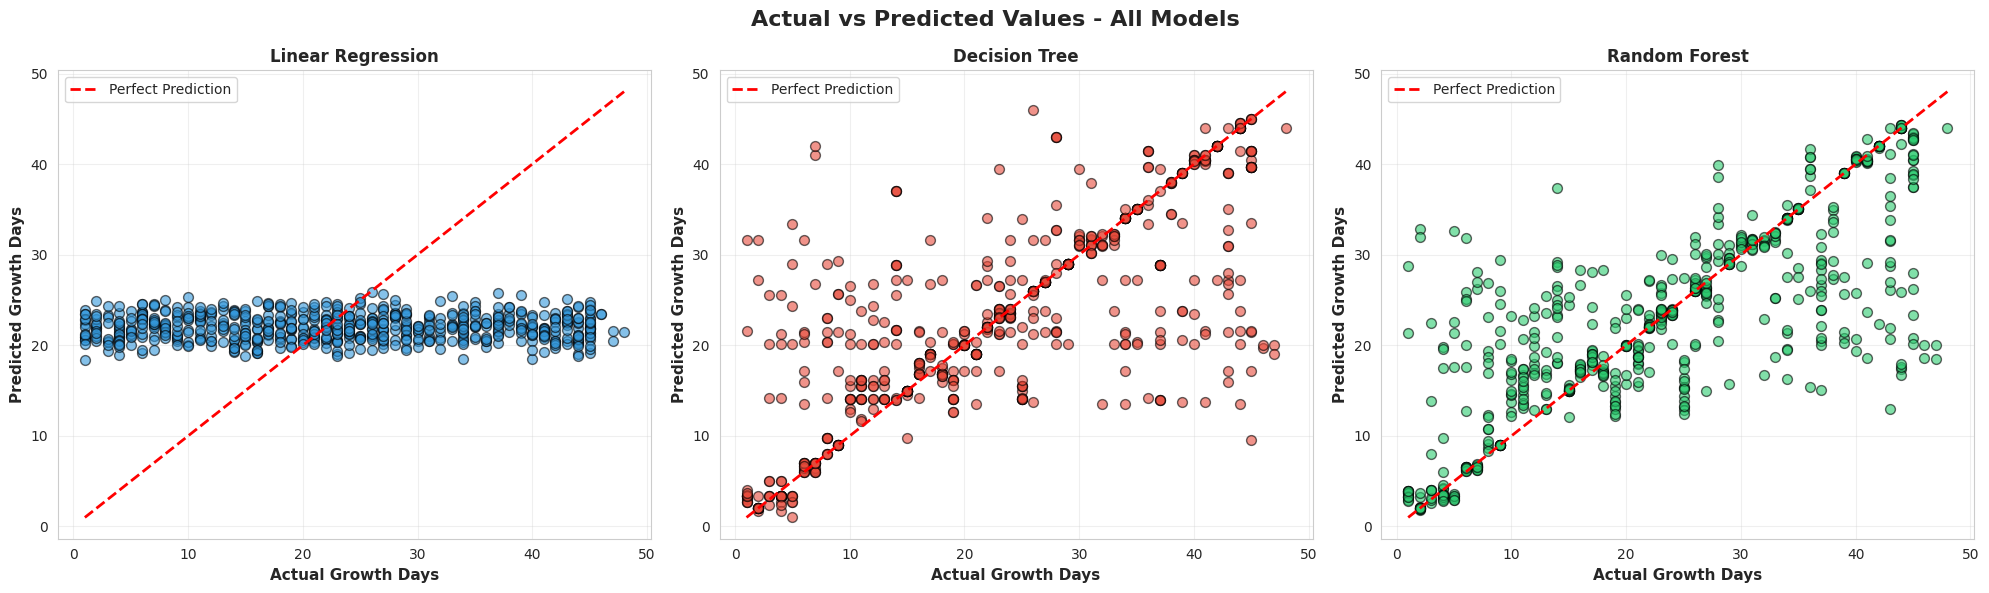

 Scatter plots saved as 'actual_vs_predicted_all_models.png'



In [14]:
print("="*80)
print("STEP 12: SCATTER PLOTS - ACTUAL VS PREDICTED")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Actual vs Predicted Values - All Models', fontsize=16, fontweight='bold')

models = [
    ('Linear Regression', y_test_pred_lr, '#3498db'),
    ('Decision Tree', y_test_pred_dt, '#e74c3c'),
    ('Random Forest', y_test_pred_rf, '#2ecc71')
]

for idx, (name, predictions, color) in enumerate(models):
    axes[idx].scatter(y_test, predictions, alpha=0.6, color=color, edgecolors='black', s=50)

    # Plot perfect prediction line
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

    axes[idx].set_xlabel('Actual Growth Days', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted Growth Days', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('actual_vs_predicted_all_models.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Scatter plots saved as 'actual_vs_predicted_all_models.png'\n")

STEP 13: RESIDUAL ANALYSIS


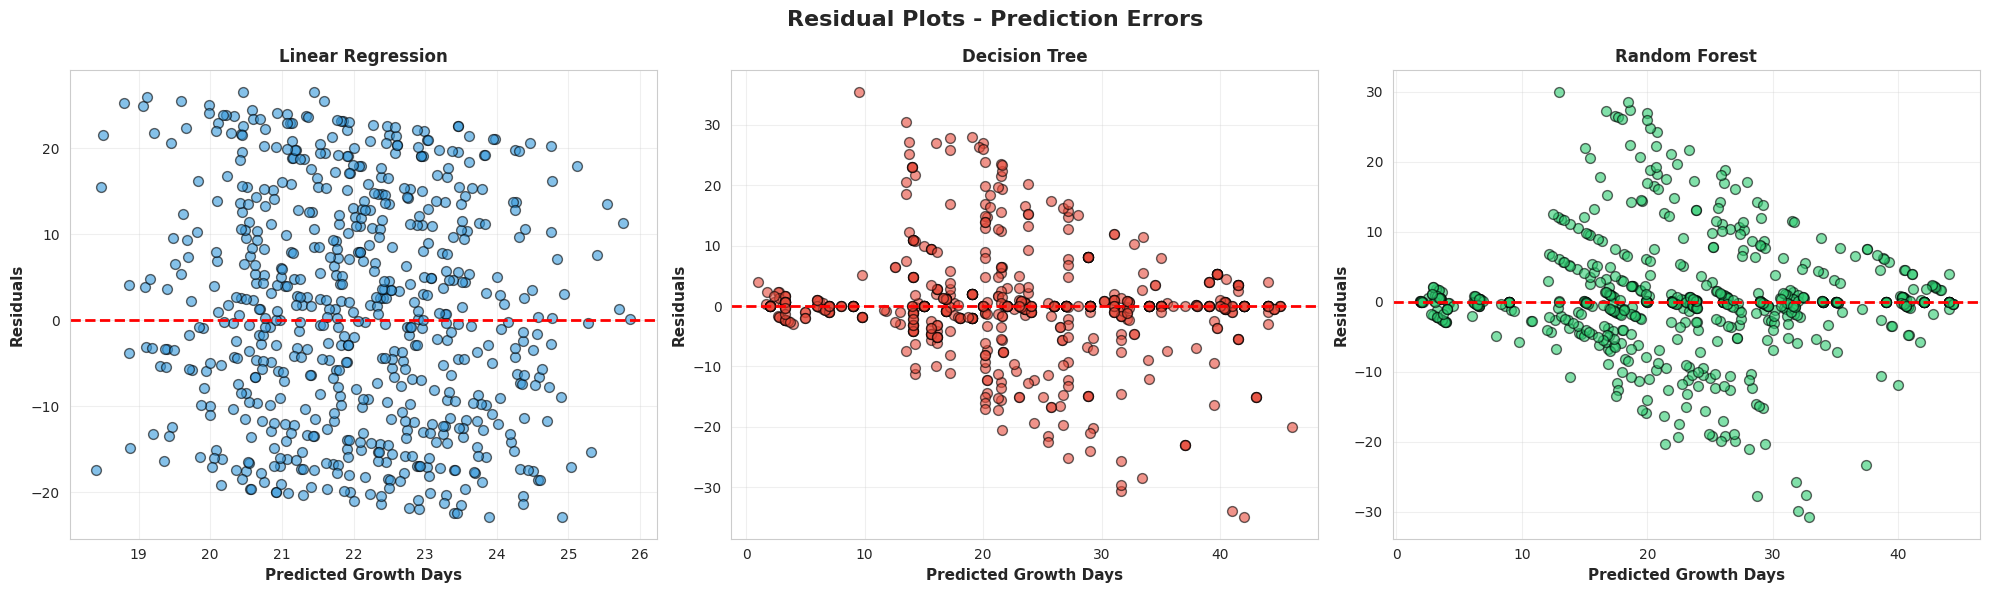

 Residual plots saved as 'residual_plots.png'



In [15]:
print("="*80)
print("STEP 13: RESIDUAL ANALYSIS")
print("="*80)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Residual Plots - Prediction Errors', fontsize=16, fontweight='bold')

for idx, (name, predictions, color) in enumerate(models):
    residuals = y_test - predictions
    axes[idx].scatter(predictions, residuals, alpha=0.6, color=color, edgecolors='black', s=50)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Growth Days', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Residuals', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name}', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Residual plots saved as 'residual_plots.png'\n")


In [16]:
print("="*80)
print("STEP 14: SAVING THE BEST MODEL")
print("="*80)

# Select best model based on R²
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
else:
    best_model = rf_model

# Save the model
joblib.dump(best_model, 'best_model.pkl')
print(f"✓ Best model ({best_model_name}) saved as 'best_model.pkl'")

# Save model metadata
model_info = {
    'model_name': best_model_name,
    'test_r2': comparison_df.loc[best_model_idx, 'Test R²'],
    'test_rmse': comparison_df.loc[best_model_idx, 'Test RMSE'],
    'test_mae': comparison_df.loc[best_model_idx, 'Test MAE'],
    'features': X.columns.tolist(),
    'target': target_column
}

import json
with open('model_info.json', 'w') as f:
    json.dump(model_info, f, indent=4)

print(" Model information saved as 'model_info.json'\n")

STEP 14: SAVING THE BEST MODEL
✓ Best model (Random Forest) saved as 'best_model.pkl'
 Model information saved as 'model_info.json'



In [17]:
print("="*80)
print("Step 15: REGENERATING predict.py WITH CORRECT FEATURE NAMES")
print("="*80)

prediction_script_fixed = f'''"""
PREDICTION SCRIPT - Moss Growth Prediction System
Auto-generated with correct feature names
"""

import joblib
import numpy as np
import pandas as pd
import json

def load_model():
    """Load the saved model and scaler"""
    try:
        model = joblib.load('best_model.pkl')
        scaler = joblib.load('scaler.pkl')

        with open('model_info.json', 'r') as f:
            model_info = json.load(f)

        return model, scaler, model_info
    except FileNotFoundError as e:
        print(f"Error: Required file not found - {{e}}")
        return None, None, None

def predict_growth_days(temperature, humidity, tds, ph):
    """
    Predict growth days based on environmental factors

    Parameters:
    -----------
    temperature : float - Temperature in Celsius
    humidity : float - Humidity percentage
    tds : float - Total Dissolved Solids in ppm
    ph : float - pH level

    Returns:
    --------
    float : Predicted growth days
    dict : Input conditions and prediction details
    """
    model, scaler, model_info = load_model()

    if model is None:
        return None, None

    # Get actual feature names from model
    feature_names = model_info['features']

    # Create input with exact feature names from training
    input_values = [temperature, humidity, tds, ph]
    input_data = pd.DataFrame([input_values], columns=feature_names)

    # Standardize and predict
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]

    result = {{
        'input_conditions': {{
            'temperature': temperature,
            'humidity': humidity,
            'tds': tds,
            'ph': ph
        }},
        'predicted_growth_days': round(prediction, 2),
        'model_used': model_info['model_name'],
        'model_accuracy_r2': round(model_info['test_r2'], 4)
    }}

    return prediction, result

def get_interpretation(predicted_days):
    """Provide interpretation of predicted growth days"""
    if predicted_days < 15:
        return "Very fast growth - Excellent conditions"
    elif predicted_days < 25:
        return "Fast growth - Good conditions"
    elif predicted_days < 35:
        return "Moderate growth - Acceptable conditions"
    else:
        return "Slow growth - Suboptimal conditions"

# Test the function
if __name__ == "__main__":
    print("="*70)
    print(" MOSS GROWTH PREDICTION SYSTEM ".center(70, "="))
    print("="*70)

    model, scaler, model_info = load_model()

    if model:
        print(f"\\nModel: {{model_info['model_name']}}")
        print(f"Features: {{model_info['features']}}")
        print(f"R² Score: {{model_info['test_r2']:.4f}}")

        print("\\n" + "="*70)
        print("Example Prediction:")
        print("="*70)

        pred, details = predict_growth_days(22.5, 70, 600, 6.4)
        if pred:
            print(f"Predicted: {{pred:.2f}} days")
            print(f"{{get_interpretation(pred)}}")
'''

# Save the corrected script
with open('predict.py', 'w') as f:
    f.write(prediction_script_fixed)


print(" Prediction script created as 'predict.py'\n")

Step 15: REGENERATING predict.py WITH CORRECT FEATURE NAMES
 Prediction script created as 'predict.py'



In [18]:
print("="*80)
print("STEP 16: TESTING THE PREDICTION SCRIPT")
print("="*80)

# Test prediction with sample data
print("Testing prediction with sample environmental conditions:\n")

# Get the actual feature names used in training
feature_names = X.columns.tolist()
print(f"Model expects these features: {feature_names}\n")

# Create test cases using the ACTUAL column names from the dataset
test_conditions = [
    {'desc': 'Optimal conditions', 'values': [22.5, 70.0, 600.0, 6.4]},
    {'desc': 'Hot and dry', 'values': [30.0, 55.0, 450.0, 6.2]},
    {'desc': 'Cool and humid', 'values': [20.0, 75.0, 700.0, 6.6]},
]

for idx, condition in enumerate(test_conditions, 1):
    # Create input using actual feature names
    input_data = pd.DataFrame([condition['values']], columns=feature_names)

    input_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_scaled)[0]

    print(f"Test Case {idx}: {condition['desc']}")
    print(f"  Input values: {condition['values']}")
    print(f"  → Predicted Growth Days: {prediction:.2f} days\n")

print(" Prediction script tested successfully!\n")

STEP 16: TESTING THE PREDICTION SCRIPT
Testing prediction with sample environmental conditions:

Model expects these features: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level']

Test Case 1: Optimal conditions
  Input values: [22.5, 70.0, 600.0, 6.4]
  → Predicted Growth Days: 28.92 days

Test Case 2: Hot and dry
  Input values: [30.0, 55.0, 450.0, 6.2]
  → Predicted Growth Days: 15.46 days

Test Case 3: Cool and humid
  Input values: [20.0, 75.0, 700.0, 6.6]
  → Predicted Growth Days: 24.49 days

 Prediction script tested successfully!

